## Bitcoin

### On chain analysis on price sold / price paid aka Spent Output Profit Ratio (SOPR)

In [153]:
import matplotlib.pyplot as plt
import json
import requests
import pandas as pd
import numpy as np
from scipy.stats import linregress
import seaborn as sns

In [154]:
api_key = '20JxlOEtZNet0TQR4TiAegMh0cN'

res = requests.get('https://api.glassnode.com/v1/metrics/indicators/sopr',
                    params={'a':'BTC', 'api_key' : api_key})

df = pd.read_json(res.text)
df = (df.tail(120)) # Last 120 days data

x = df.t # date
y = df.v # SOPR ratio value

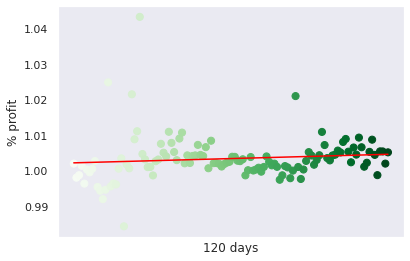

In [155]:
stats = linregress(x, y)
m = stats.slope
b = stats.intercept


fig = plt.figure()

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
ax.set_xticks([20,40,60,80,100])
ax.plot(x, m * x + b, color="red")
ax.set_xlabel('Last 120 days')
ax.set_ylabel('% profit')

plt.scatter(x, y, s=50, c=df.t, cmap='Greens')
sns.set_style("dark")
sns.set_context("notebook")
plt.show() 